#### Life cycle of Machine learning Project

1.Understanding the Problem Statement

2.Data Collection

3.Data Checks to perform

4.Exploratory data analysis

5.Data Pre-Processing

6.Model Training

7.Choose best model

#### 1) Problem statement

●	Predict whether the Bills are fake or genuine based on the given features.

##### 2) Data Collection
Dataset Source - https://drive.google.com/file/d/1xJzCC38T2r5wGvxogNojXRy5dXTV4hsi/view?usp=share_link

#### 2.1 Importing Libraries :

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import CSV data set as pandas dataframe :

In [68]:
df = pd.read_csv("data\Fake Bills.csv",sep = ";")

In [69]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [70]:
df.shape

(1500, 7)

##### 2.2 Dataset information:

The dataset includes 1500 rows and 7 columns:

length, the length of the banknote in mm

height left, the height of the left side of the banknote in mm

height right, the height of the right side of the bank note in mm

diagonal, the diagonal of the bank note in mm

margin low, lower side margin in mm

margin up, upper side margin in mm

The last column is_genuine is the target



##### 3. Data Checks to perform


1.Check Missing values

2.Check Duplicates

3.Check data type

4.Check the number of unique values of each column

5.Check statistics of data set

6.Check various categories present in the different categorical column

In [71]:
df.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [73]:
df.duplicated().sum()


0

In [74]:
df.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

In [75]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [76]:
df['margin_low'].unique()

array([4.52, 3.77, 4.4 , 3.62, 4.04, 4.42, 4.58, 3.98, 4.  , 3.16, 3.88,
       4.11, 4.44, 4.09, 4.43, 4.12, 4.56, 3.74, 4.55, 4.25, 3.93, 3.32,
       4.18, 4.32, 4.15, 4.02, 3.97, 4.1 , 3.68, 4.62, 4.13, 4.54, 4.36,
       4.47, 3.39, 3.73, 3.99, 3.72, 4.01, 4.19, 3.71, 4.28, 4.49, 3.49,
       3.95, 4.07, 4.05, 4.14, 3.44, 4.38, 3.8 , 3.79, 4.08, 4.35,  nan,
       3.81, 4.16, 4.92, 4.3 , 3.7 , 4.5 , 3.96, 4.24, 4.31, 4.03, 4.64,
       3.65, 4.59, 3.87, 4.23, 3.94, 4.27, 3.59, 4.06, 3.66, 4.21, 3.52,
       3.91, 4.37, 3.26, 4.41, 4.61, 4.39, 4.2 , 3.85, 4.73, 4.66, 4.46,
       3.76, 4.29, 3.53, 4.26, 4.17, 3.86, 3.47, 4.34, 3.56, 4.86, 4.33,
       3.9 , 4.8 , 4.74, 4.72, 4.79, 4.48, 3.89, 3.84, 4.88, 4.63, 3.54,
       4.6 , 3.83, 3.57, 4.22, 3.92, 3.51, 4.57, 3.67, 3.75, 4.77, 3.55,
       3.35, 3.82, 3.64, 4.45, 4.53, 3.41, 4.83, 4.51, 3.69, 4.75, 4.7 ,
       3.24, 4.69, 4.89, 3.6 , 3.25, 4.91, 3.61, 3.43, 4.67, 3.78, 5.04,
       4.94, 3.63, 3.12, 4.78, 4.87, 3.48, 2.98, 3.

In [77]:
df['margin_low'] = df['margin_low'].fillna(df['margin_low'].mean())

In [78]:
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

#####  4. Exploring Data ( Visualization )


<AxesSubplot:xlabel='is_genuine', ylabel='count'>

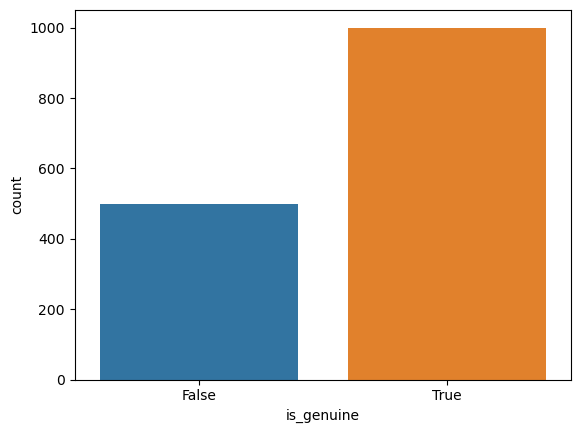

In [79]:
sns.countplot(data=df, x='is_genuine')

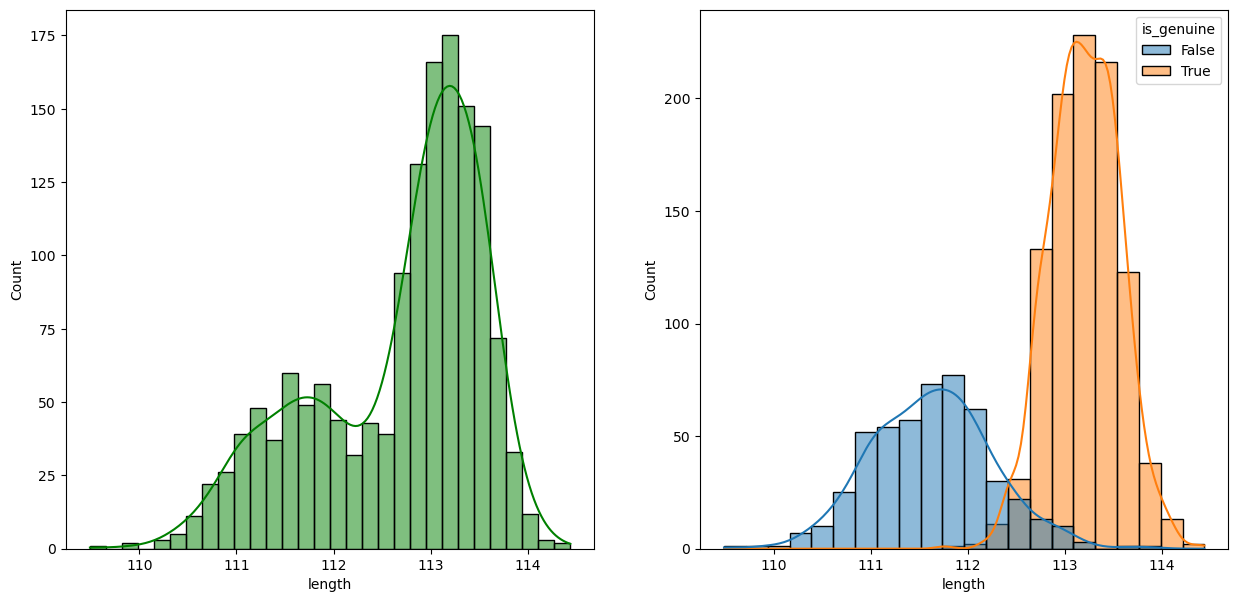

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='length',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='length',kde=True,hue='is_genuine')
plt.show()

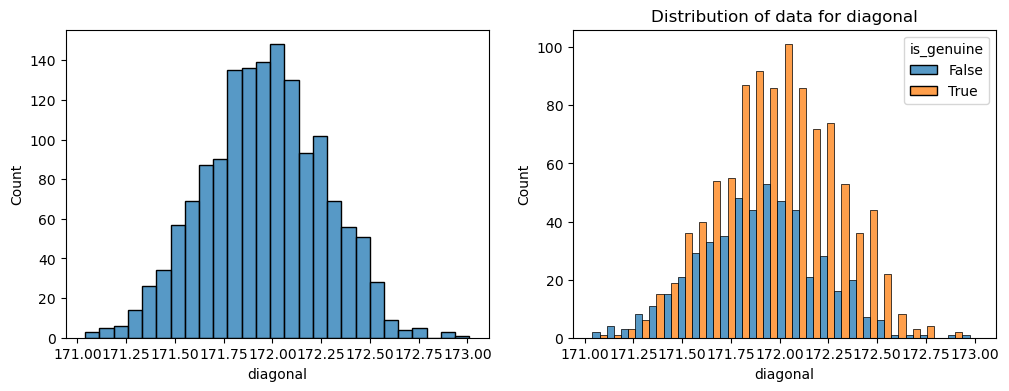

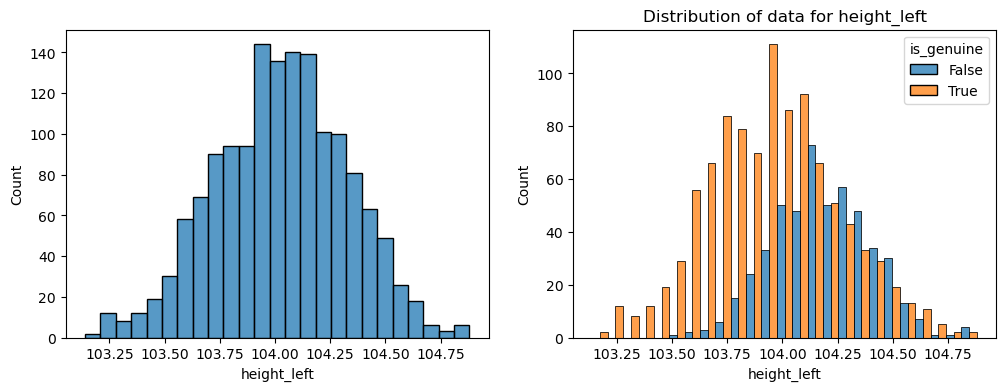

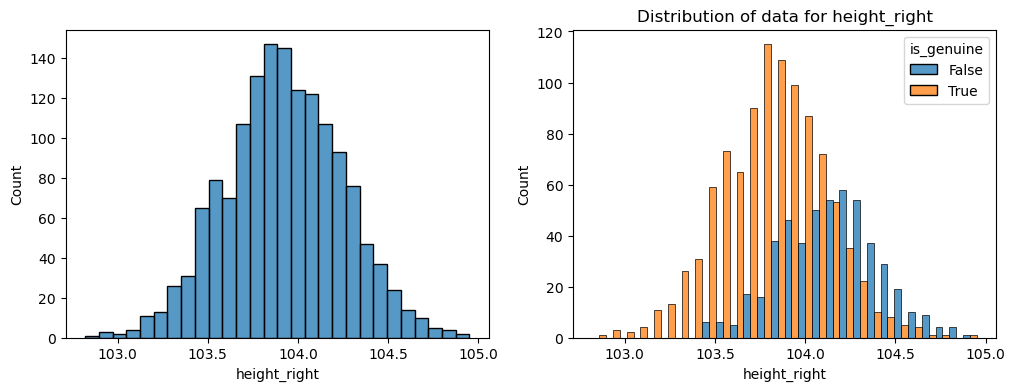

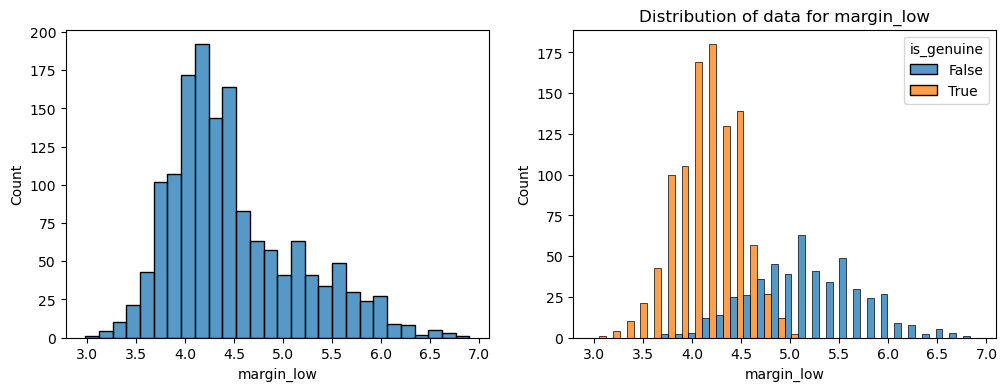

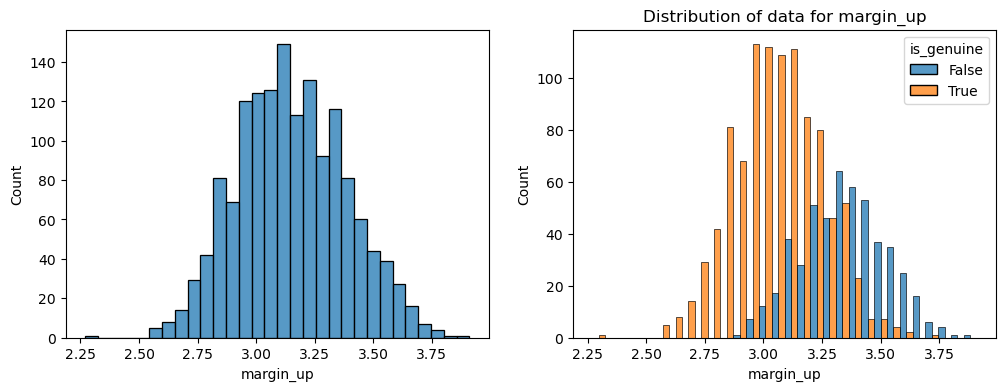

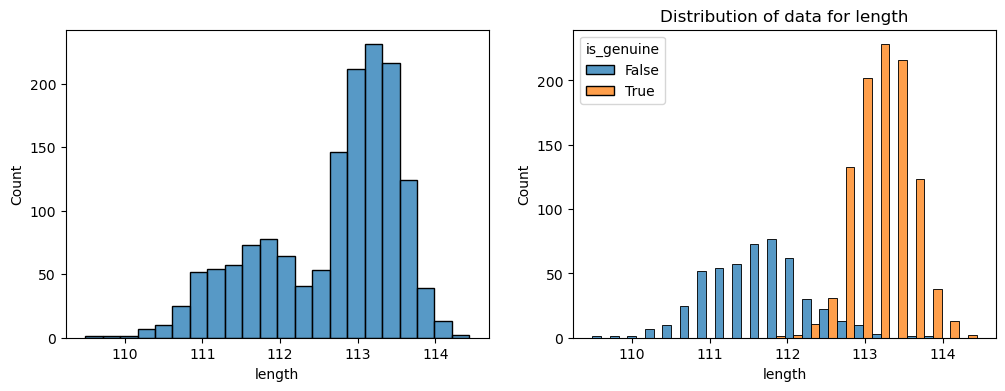

In [81]:
for col in df.columns[1:]:
    fig, ax = plt.subplots(1,2,figsize=(12,4))
    sns.histplot(data=df, x=col, ax=ax[0])
    sns.histplot(data=df, x=col, hue='is_genuine', ax=ax[1], multiple='dodge')
    plt.title(f"Distribution of data for {col}")
    plt.show()

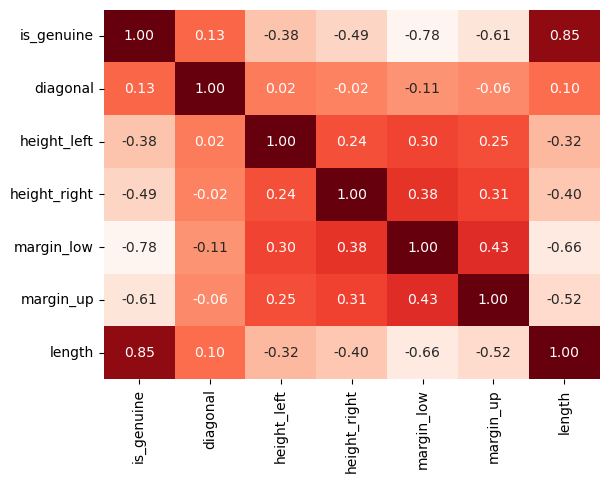

In [82]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cbar=None, cmap='Reds');